In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading data

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
# data type of dataset
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [5]:
# creating validation data snd scaling data to range (0-1)

X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

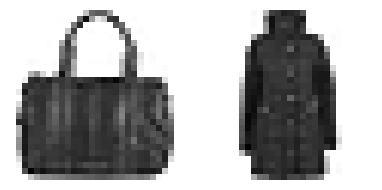

In [6]:
# looking at first two images

plt.figure(figsize = (4, 2))
plotnumber = 1

for i in range(2):
    if plotnumber <= 2:
        ax = plt.subplot(1, 2, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')

    plotnumber += 1

plt.tight_layout()
plt.show()

In [7]:
y_train

array([8, 4, 3, ..., 3, 0, 5], dtype=uint8)

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [9]:
class_names[y_train[0]], class_names[y_train[1]]

('Bag', 'Coat')

In [10]:
X_valid.shape

(4000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

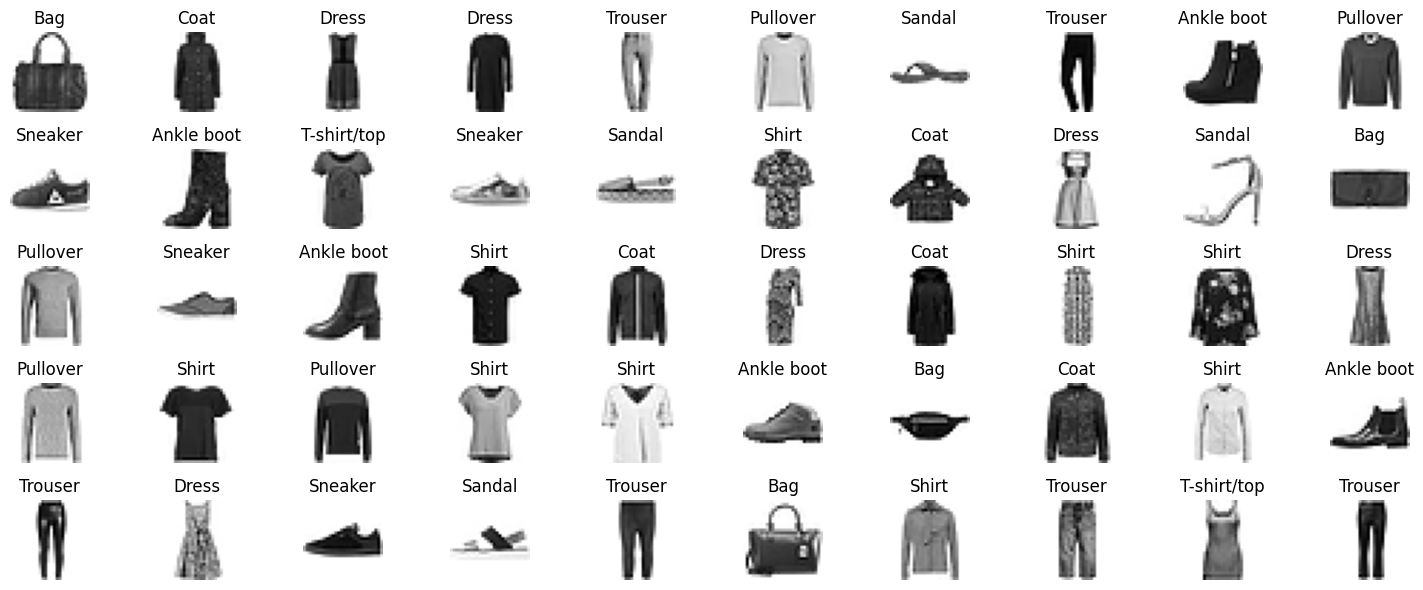

In [12]:
#Let’s take a look at a sample of the images in the dataset
plt.figure(figsize = (15, 6))
plotnumber = 1

for i in range(51):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize'  : 12, 'color' : 'black'})

    plotnumber += 1

plt.tight_layout()
plt.show()

In [13]:
#Model Building
# building sequential model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [14]:
# summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 70)                  │           7,070 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,350 (352.93 KB)

 Trainable params: 90,350 (352.93 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Compiling the Image Classification Model
# compiling model

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [18]:
#Training and Evaluating the Image Classification Model
# fitting model

model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 40)

Epoch 1/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9419 - loss: 0.1505 - val_accuracy: 0.8673 - val_loss: 69.0305
Epoch 2/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9427 - loss: 0.1478 - val_accuracy: 0.8602 - val_loss: 68.5952
Epoch 3/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9423 - loss: 0.1489 - val_accuracy: 0.8585 - val_loss: 71.5569
Epoch 4/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9461 - loss: 0.1415 - val_accuracy: 0.8593 - val_loss: 74.9693
Epoch 5/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9452 - loss: 0.1437 - val_accuracy: 0.8650 - val_loss: 69.5712
Epoch 6/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9434 - loss: 0.1451 - val_accuracy: 0.8597 - val_loss: 72.4379
Epoch 7/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9479 - loss: 0.1356 - val_accuracy: 0.8550 - val_loss: 70.6355
Epoch 8/40
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9494 - loss: 0

In [19]:
# evaluating model

model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.6369


[0.6489340662956238, 0.8863000273704529]